In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import csv
import pandas as pd
import matplotlib
import seaborn as sns


In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [14]:

d = pd.read_csv('D:/Jupyter-Notebook-Crash-Course/Datasets/HDS.csv')
d.head(5)
d.describe()
d.info()
print(d["HeartDisease"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Gender          918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
[0 1]


In [15]:
scaler = MinMaxScaler()
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
d[numeric_columns] = scaler.fit_transform(d[numeric_columns])

binary_columns = ['Gender', 'ExerciseAngina']
for column in binary_columns:
    d[column] = LabelEncoder().fit_transform(d[column])

nominal_columns = ['ChestPainType', 'RestingECG', 'ST_Slope']
nominal_encoder = OneHotEncoder(sparse_output=False,drop='first')
encoded_nominal = pd.DataFrame(
    nominal_encoder.fit_transform(d[nominal_columns]),
    columns=nominal_encoder.get_feature_names_out(nominal_columns)
)

d = pd.concat([d.drop(columns=nominal_columns), encoded_nominal], axis=1)

d.to_csv('HDS_pp.csv', index=False)


In [16]:
predictors = d.drop(['HeartDisease'], axis=1)
target = d["HeartDisease"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print(X_train.shape)
X_test.shape
Y_test.shape


(734, 15)


(184,)

Correlation 

In [20]:
print(d.corr()["HeartDisease"].abs().sort_values(ascending=False))

HeartDisease         1.000000
ST_Slope_Up          0.622164
ST_Slope_Flat        0.554134
ExerciseAngina       0.494282
Oldpeak              0.403951
ChestPainType_ATA    0.401924
MaxHR                0.400421
Gender               0.305445
Age                  0.282039
FastingBS            0.267291
Cholesterol          0.232741
ChestPainType_NAP    0.212964
RestingBP            0.107589
RestingECG_ST        0.102527
RestingECG_Normal    0.091580
ChestPainType_TA     0.054790
Name: HeartDisease, dtype: float64


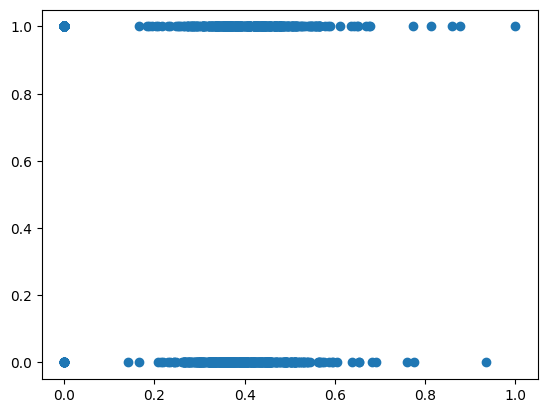

In [33]:
predictors['Cholesterol'].corr(target)
plt.scatter(predictors['Cholesterol'],target)

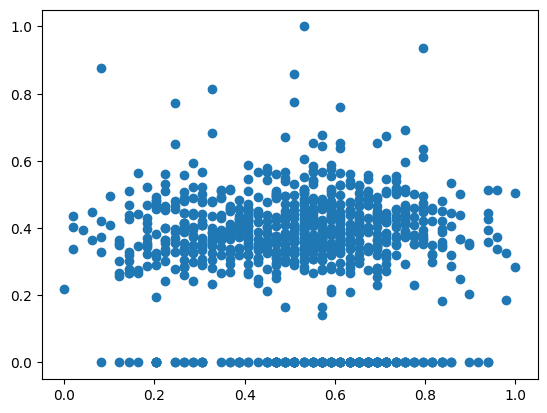

In [30]:
plt.scatter(predictors['Age'],predictors['Cholesterol'])

In [40]:
from numpy import *
import operator
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()
    classCount={}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
        sortedClassCount = sorted(classCount.items(),
        key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]


predicted class is  1


In [ ]:
Y_pred = classify0(X_test[:1].values,X_train.values, Y_train.values, 3)
print("predicted class is ",Y_pred)



ValueError: operands could not be broadcast together with shapes (135056,15) (734,15) 

array([[0.55102041, 1.        , 0.575     , 0.        , 1.        ,
        0.66901408, 0.        , 0.30681818, 0.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ]])

TypeError: Input should have at least 1 dimension i.e. satisfy `len(x.shape) > 0`, got scalar `array(1)` instead.